<a href="https://colab.research.google.com/github/Pankaj-2003/wids_diabetes/blob/main/wids_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_excel("diabetes_binary_health_indicators_BRFSS2015.xlsx")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [116]:
train

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


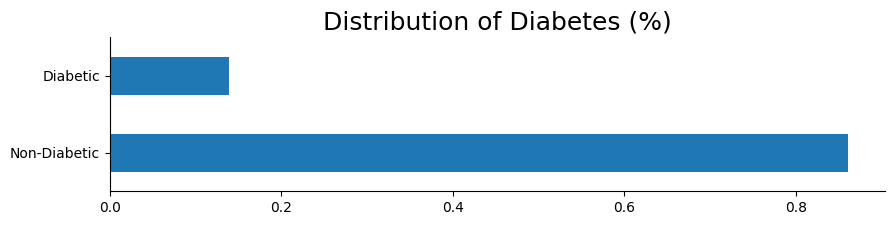

In [39]:
train["Diabetes_binary"].value_counts(normalize=True)*100

train["Diabetes_binary"].value_counts(1).plot(kind = 'barh',figsize=(10,2)).spines[['top','right']].set_visible(False);
plt.title("Distribution of Diabetes (%)", fontsize = 18)
plt.yticks(ticks= [0,1], labels = ["Non-Diabetic","Diabetic"]);

In [38]:
train[train["Diabetes_binary"]==1.0]['Sex'].value_counts(1)*100

0    52.087931
1    47.912069
Name: Sex, dtype: float64

In [40]:
train[train["Diabetes_binary"]==0.0]['Sex'].value_counts(1)*100

0    56.593568
1    43.406432
Name: Sex, dtype: float64

In [41]:
train[train["Diabetes_binary"]==1.0].Education.value_counts(1)*100

4    31.307644
6    29.423414
5    29.293272
3     6.495785
2     3.346913
1     0.132971
Name: Education, dtype: float64

In [42]:
train[train["Diabetes_binary"]==0.0].Education.value_counts(1)*100

6    44.392994
5    27.277474
4    23.671989
3     3.289456
2     1.309920
1     0.058168
Name: Education, dtype: float64

In [81]:
age_dist = train[train["Diabetes_binary"]==1.0].Age.value_counts(1)*100

<ipython-input-78-9053f0985037>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);


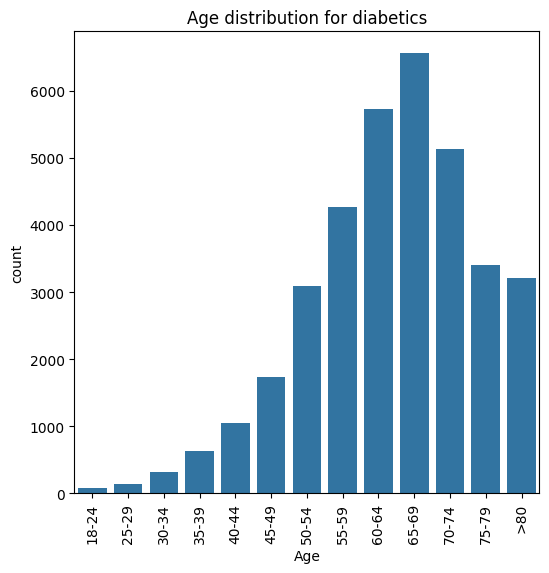

In [78]:
ax = sns.countplot(train[train['Diabetes_binary']==1.0],x = 'Age')
ax.set(title = "Age distribution for diabetics")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);

In [130]:
age_dist.head(8).sum()

93.75035364680585

In [163]:
age_dist2 = (train[train["Diabetes_binary"]==0.0].Age.value_counts(1)
             .to_frame()
             .reset_index()
             .rename(columns={'index': 'Age', 'Age': 'Percentage'}))

In [172]:
age_dist2[age_dist2["Age"]>6].Percentage.sum()*100

67.81582346313446

<ipython-input-128-d0cf83520806>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);


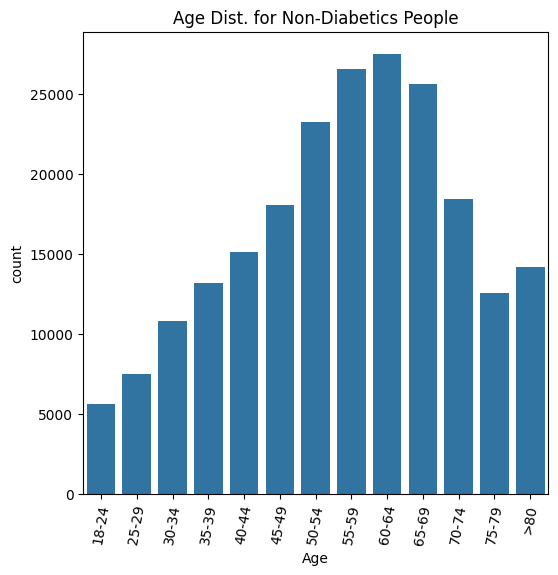

In [128]:
ax = sns.countplot(data = train[train["Diabetes_binary"]==0.0],x = "Age")
ax.set(title ="Age Dist. for Non-Diabetics People")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);
